In [1]:
import jax.numpy as jnp
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
model_type = "tensor_gru"
H_type = "cluster"
L = 64
p = 1
units = 128
numsamples = 256
dmrg = False
seed = 3
angle_list = [0.0, 0.157, 0.314, 0.471, 0.628, 0.785, 0.942, 1.1, 1.257, 1.414, 1.571]
meanE_ES = []
meanE_ES_dmrg = []
meanE_cluster = []
evalE_ES = []
evalE_ES_dmrg = []
evalvar_ES_dmeg = []
evalvar_ES = []
evalE_cluster = []
evalvar_cluster = []

for i in angle_list:
    meanE_ES.append(np.load("result/meanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_ES_dmrg.append(np.load("result/meanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_cluster.append(np.load("result/meanE_1DRNN_Htypecluster_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES.append(np.load("result/evalmeanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES_dmrg.append(np.load("result/evalmeanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_ES.append(np.load("result/evalvarE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_cluster.append(np.load("result/evalmeanE_1DRNN_Htypecluster_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_cluster.append(np.load("result/evalvarE_1DRNN_Htypecluster_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())


C:\Users\Administrator\PycharmProjects\Final_version\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


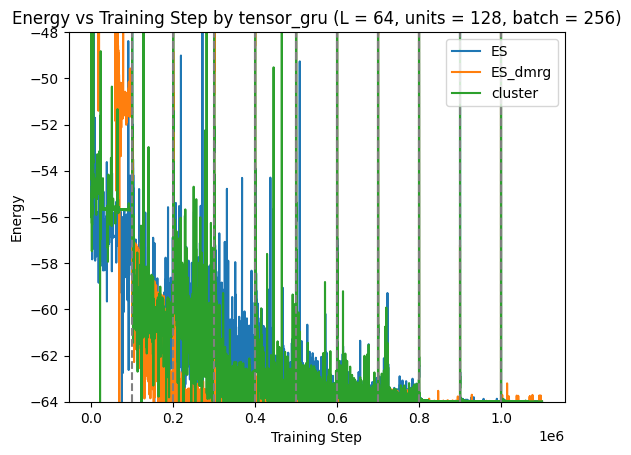

In [2]:
plt.plot(np.arange(len(np.array(meanE_ES).ravel())), np.array(meanE_ES).ravel().real, label = "ES")
plt.plot(np.arange(len(np.array(meanE_ES_dmrg).ravel())), np.array(meanE_ES_dmrg).ravel().real, label = "ES_dmrg")
plt.plot(np.arange(len(np.array(meanE_cluster).ravel())), np.flip(np.array(meanE_cluster).reshape(11, -1), axis = 0) .ravel().real, label = "cluster")
for i in range(1, 11):
    plt.axvline(x=i*100000, color="gray", linestyle="--")
plt.ylim(-64, -48)
plt.ylabel("Energy")
plt.xlabel("Training Step")
plt.title("Energy vs Training Step by tensor_gru (L = 64, units = 128, batch = 256)")
plt.legend()
plt.show()

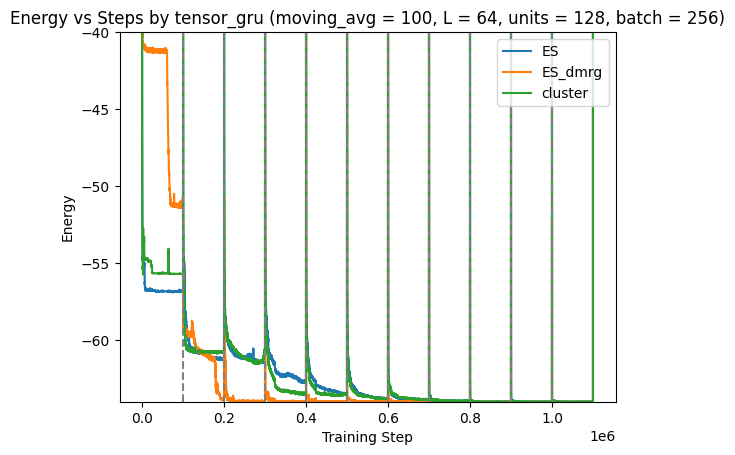

In [3]:
def moving_average(data, window_size = 100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')
plt.plot(np.arange(len(np.array(meanE_ES).ravel())), moving_average(np.array(meanE_ES).ravel().real), label = "ES")
plt.plot(np.arange(len(np.array(meanE_ES_dmrg).ravel())), moving_average(np.array(meanE_ES_dmrg).ravel().real), label = "ES_dmrg")
plt.plot(np.arange(len(np.array(meanE_cluster).ravel())), moving_average(np.flip(np.array(meanE_cluster).reshape(11, -1), axis = 0).ravel().real), label = "cluster")
for i in range(1, 11):
    plt.axvline(x=i*100000, color="gray", linestyle="--")
plt.ylim(-64, -40)
plt.ylabel("Energy")
plt.xlabel("Training Step")
plt.title("Energy vs Steps by tensor_gru (moving_avg = 100, L = 64, units = 128, batch = 256)")
plt.legend()
plt.show()

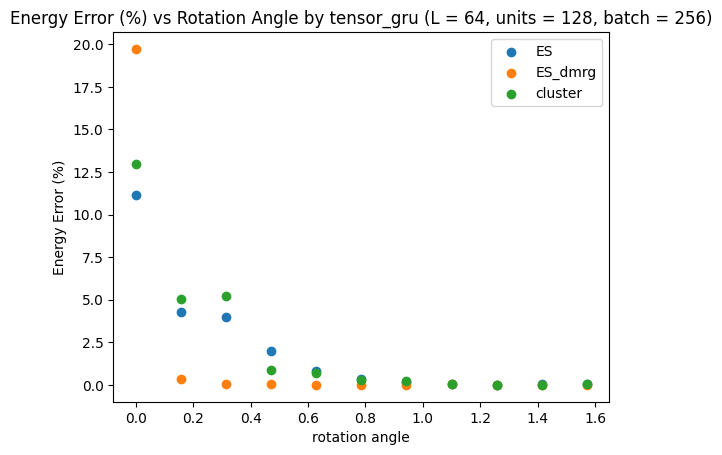

In [4]:
plt.scatter(np.array(angle_list), ((np.array(evalE_ES)+64).real/64*100).ravel(), label = "ES")
plt.scatter(np.array(angle_list), ((np.array(evalE_ES_dmrg)+64).real/64*100).ravel(), label = "ES_dmrg")
plt.scatter(np.array(angle_list), ((np.flip(np.array(evalE_cluster))+64).real/64*100).ravel(), label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Energy Error (%)")
plt.title("Energy Error (%) vs Rotation Angle by tensor_gru (L = 64, units = 128, batch = 256)")
plt.legend()
plt.show()

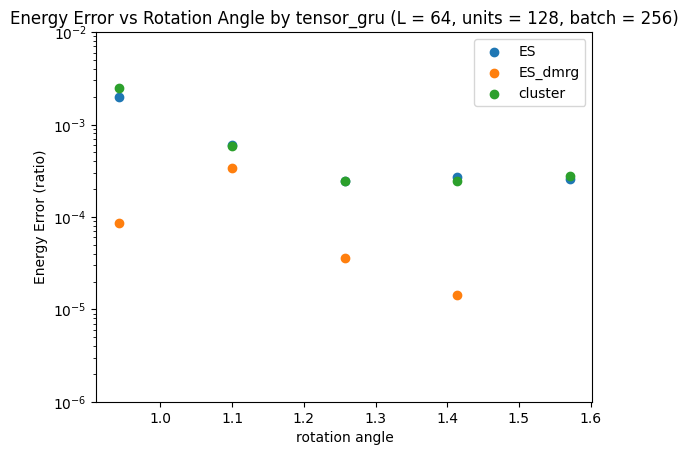

In [5]:
plt.scatter(np.array(angle_list)[-5:], ((np.array(evalE_ES[-5:])+64).real/64).ravel(), label = "ES")
plt.scatter(np.array(angle_list)[-5:], ((np.array(evalE_ES_dmrg[-5:])+64).real/64).ravel(), label = "ES_dmrg")
plt.scatter(np.array(angle_list)[-5:], ((np.flip(np.array(evalE_cluster[:5]))+64).real/64).ravel(), label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Energy Error (ratio)")
plt.yscale("log")
plt.ylim(1e-6, 1e-2)
plt.title("Energy Error vs Rotation Angle by tensor_gru (L = 64, units = 128, batch = 256)")
plt.legend()
plt.show()